In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon


# Set display options to show more columns and wider output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


/Users/catherine/Library/Caches/pypoetry/virtualenvs/gpbp-ys_3FNdB-py3.10/lib/python3.10/site-packages/geopandas/_compat.py:154: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  set_use_pygeos()
/var/folders/fv/d5ds85j11jl7k4tvpy6q0n1h0000gn/T/ipykernel_63954/3733655342.py:5: DeprecationWarning: GeoPandas is set to use PyGEOS over Shapely. PyGEOS support is deprecatedand will be removed in GeoPandas 1.0, released in the Q1 of 2024. Please migrate to Shapely 2.0 (https://geopandas.org/en/stable/docs/user_guide/pygeos_to_shapely.html).
  import geopandas as gpd


In [2]:
G = ox.load_graphml("walk_network_4_nodes_6_edges.graphml")

In [21]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

gdf_nodes.reset_index(inplace=True)

gdf_nodes


,osmid,y,x,street_count,geometry
0,5909483625,37.768758,-122.231243,1,POINT (-122.23124 37.76876)
1,5909483619,37.768705,-122.231407,3,POINT (-122.23141 37.76871)
2,5909483636,37.768958,-122.231784,4,POINT (-122.23178 37.76896)
3,5909483569,37.768278,-122.231595,3,POINT (-122.23159 37.76828)


In [34]:
gdf_nodes.iloc[3]

osmid                               5909483569
y                                    37.768278
x                                  -122.231595
street_count                                 3
geometry        POINT (-122.2315948 37.768278)
Name: 3, dtype: object

### Plot all of G's nodes

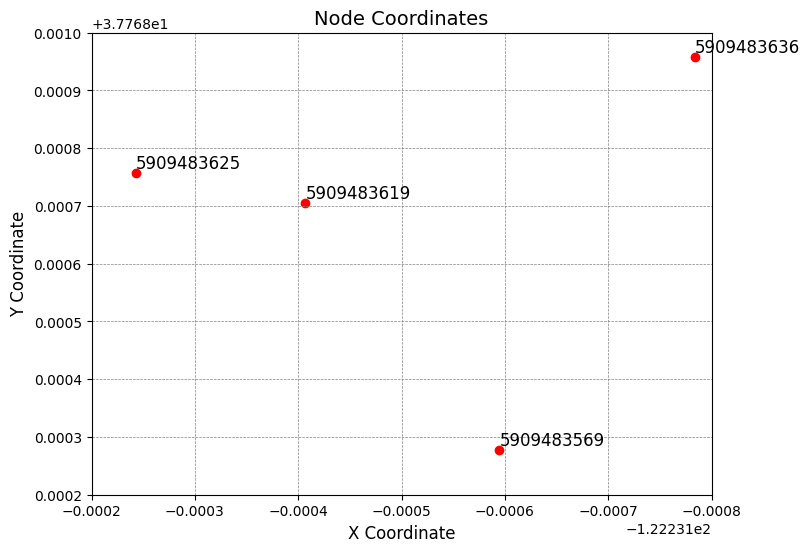

In [25]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(gdf_nodes['x'], gdf_nodes['y'], color='red')

# Add annotations for nodes
for i, row in gdf_nodes.iterrows():
    plt.text(row['x'], row['y'], f"{row['osmid']}", fontsize=12, ha='left', va='bottom', color='black')

# Labels and title
plt.title('Node Coordinates', fontsize=14)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xlim(-122.2312, -122.2318)
plt.ylim(37.7682, 37.769)
plt.show()


In [29]:
x = -122.2313
y = 37.76871

### These nodes and edges are the closest to x, y

In [4]:
nodes_gdf = gpd.GeoSeries(
    [
            Point(-122.2314069, 37.7687054),
            Point(-122.231243, 37.7687576),
            Point(-122.2317839, 37.7689584),
        ],
)

nodes_gdf

0    POINT (-122.23141 37.76871)
1    POINT (-122.23124 37.76876)
2    POINT (-122.23178 37.76896)
dtype: geometry

In [5]:
coordinates_25_to_19 = [(-122.23124, 37.76876), (-122.23141, 37.76871)]

coordinates_19_to_36 = [
        (-122.2314069, 37.7687054),
        (-122.2314797, 37.7687656),
        (-122.2315618, 37.7688239),
        (-122.2316698, 37.7688952),
        (-122.2317839, 37.7689584),
    ]

edges_gdf = gpd.GeoSeries(
        [
            LineString(coordinates_25_to_19),  # edge 5909483625 -> 5909483619
            LineString(coordinates_25_to_19[::-1]),  # edge 5909483619 -> 5909483625
            LineString(coordinates_19_to_36),  # edge 5909483619 -> 5909483636
            LineString(coordinates_19_to_36[::-1]),  # edge 5909483636 -> 5909483619
        ]
    )

edges_gdf

0                                                                   LINESTRING (-122.23124 37.76876, -122.23141 37.76871)
1                                                                   LINESTRING (-122.23141 37.76871, -122.23124 37.76876)
2    LINESTRING (-122.23141 37.76871, -122.23148 37.76877, -122.23156 37.76882, -122.23167 37.76890, -122.23178 37.76896)
3    LINESTRING (-122.23178 37.76896, -122.23167 37.76890, -122.23156 37.76882, -122.23148 37.76877, -122.23141 37.76871)
dtype: geometry

In [6]:
nodes_and_edges = pd.concat([nodes_gdf, edges_gdf])
nodes_and_edges


0                                                                                             POINT (-122.23141 37.76871)
1                                                                                             POINT (-122.23124 37.76876)
2                                                                                             POINT (-122.23178 37.76896)
0                                                                   LINESTRING (-122.23124 37.76876, -122.23141 37.76871)
1                                                                   LINESTRING (-122.23141 37.76871, -122.23124 37.76876)
2    LINESTRING (-122.23141 37.76871, -122.23148 37.76877, -122.23156 37.76882, -122.23167 37.76890, -122.23178 37.76896)
3    LINESTRING (-122.23178 37.76896, -122.23167 37.76890, -122.23156 37.76882, -122.23148 37.76877, -122.23141 37.76871)
dtype: geometry

In [43]:
excluded_node = gpd.GeoSeries(Point(-122.2315948, 37.768278))

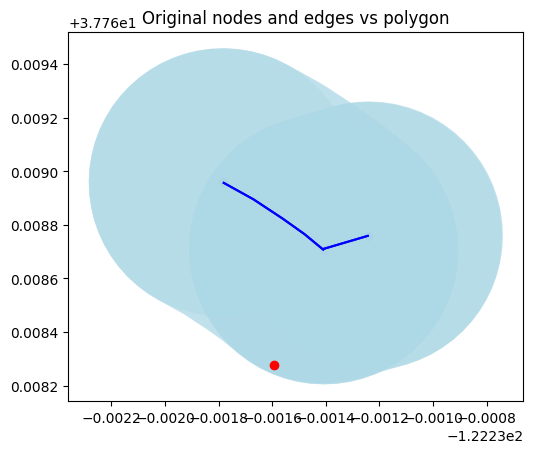

In [46]:
def plot_poly(buffer: float):
    # Plot the original edges
    ax = nodes_and_edges.plot(color='blue', label='Original')

    # Plot the buffered geometries on the same axes
    nodes_and_edges.buffer(buffer).plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer')

    excluded_node.plot(ax=ax, color='red')

    # Add legend and title
    plt.title("Original nodes and edges vs polygon")

    # Show the plot
    plt.show()


plot_poly(buffer=0.0005)


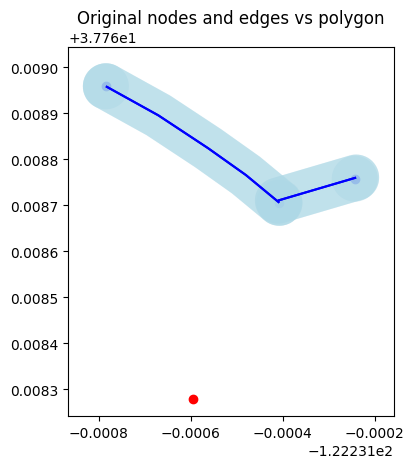

In [47]:
plot_poly(buffer=0.00005)
